# Dimensionality Reduction by Extracting Principal Component

## Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv('wine.csv')
df.shape

(178, 14)

In [11]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
X = df.iloc[:, 1:]
y = df['class']

## Split Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [32]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

## Import PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [36]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187]


In [37]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alcalinity of ash,-0.244,0.035
Magnesium,0.148,-0.262
Total phenols,0.385,-0.096
Flavanoids,0.420,-0.015
Nonflavanoid phenols,-0.299,-0.076
Proanthocyanins,0.308,-0.074
Color intensity,-0.119,-0.534


In [38]:
pca = PCA(n_components=None)

In [39]:
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [75]:
pca.transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [76]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [77]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

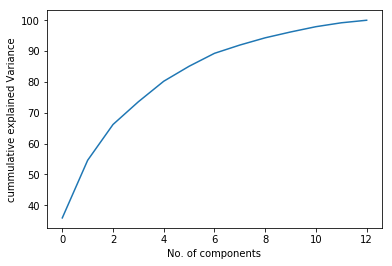

In [78]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

***

## Abalone Data PCA

In [48]:
df2 = pd.read_csv('abalone.csv')
df2.shape

(4177, 9)

In [49]:
df2.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [53]:
X2 = df2.iloc[:, 1:]
y2 = df2['Sex']



## Split Data

In [55]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)

In [56]:
sc2 = StandardScaler()

In [57]:
sc2.fit(X2_train)
X2_train_sc = sc2.transform(X2_train)
X2_test_sc = sc2.transform(X2_test)

## PCA

In [65]:
pca2 = PCA(n_components=2)
pca2.fit(X2_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
pca2.explained_variance_ratio_

array([0.83612669, 0.0875573 ])

In [68]:
print(np.round(pca2.explained_variance_ratio_, 3))

[0.836 0.088]


In [69]:
pd.DataFrame(np.round(pca2.components_, 3), columns=X2.columns).T

,0,1
Length,0.373,-0.073
Diameter,0.374,-0.045
Height,0.336,0.074
Whole weight,0.379,-0.136
Shucked weight,0.364,-0.295
Viscera weight,0.369,-0.171
Shell weight,0.371,0.050
Rings,0.242,0.922


In [70]:
pca2 = PCA(n_components=None)
pca2.fit(X2_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [71]:
pca2.transform(X2_train_sc)

array([[-2.90218146e-01,  4.44276403e-01, -1.68797436e-01, ...,
         5.73217549e-02, -1.09005793e-01, -8.96479409e-03],
       [-1.81483035e+00, -2.36234287e-01, -2.79839346e-01, ...,
         1.97065999e-01,  7.89376901e-02, -4.26233041e-03],
       [-4.18948504e+00, -1.69304845e-04, -3.50495748e-01, ...,
         1.53840304e-03,  7.54804676e-03,  9.28207772e-03],
       ...,
       [-8.15511071e-01,  5.72061136e-01, -5.96026013e-02, ...,
        -4.12813843e-02,  1.39911914e-02, -4.36446511e-02],
       [ 6.82762199e-01, -6.90443954e-01, -6.48520588e-01, ...,
         1.84568510e-01, -1.41276117e-01,  6.37000234e-02],
       [ 1.12889025e+00, -1.57161130e+00,  2.68986644e-01, ...,
         1.39584516e-01, -9.03668792e-02,  8.58953007e-02]])

In [72]:
print(np.round(pca2.explained_variance_ratio_, 3))

[0.836 0.088 0.035 0.021 0.011 0.008 0.002 0.001]


In [73]:
np.cumsum(pca2.explained_variance_ratio_)

array([0.83612669, 0.92368399, 0.95829304, 0.9792597 , 0.99001022,
       0.99777291, 0.99929894, 1.        ])

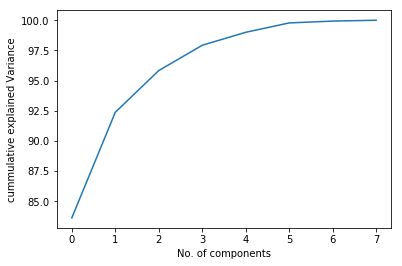

In [74]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");